In [7]:
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import numpy as np
import cftime

In [8]:
surfile = '/Users/user/Desktop/Yuan_phdrecord/cesm_inputdata/surfdata_0.9x1.25_hist_16pfts_Irrig_CMIP6_simyr1850_c190214.nc'
ds = xr.open_dataset(surfile)

surfile_0_9 = '/Users/user/Desktop/Yuan_phdrecord/project1/inputdata/constantAlbedo0.9/surfdata_0.9x1.25_hist_16pfts_Irrig_CMIP6_simyr1850_c231229_roofalbedo0.9.nc'
ds_0_9 = xr.open_dataset(surfile_0_9)

surfile_dyn ='/Users/user/Desktop/Yuan_phdrecord/project1/inputdata/time-varying_albedo/CLM50_DynUrbanAlbedoRoof_YuanSun_2023_0.9x1.25_simyr1849-2106_c20231005.nc'
ds_dyn = xr.open_dataset(surfile_dyn)

In [9]:
years = np.arange(2015, 2101, dtype=float)
#years

In [10]:
time_range = slice(cftime.DatetimeNoLeap(2015, 1, 1), cftime.DatetimeNoLeap(2100, 1, 1))
ds_dyn_sel = ds_dyn.sel(time=time_range)
landmask=ds_dyn_sel['LANDMASK']

In [11]:
con_alb = ds['ALB_ROOF_DIR']
mask = ds['ALB_ROOF_DIR'] !=0
# only urban areas
roof_alb = con_alb.where(mask).mean()
alb_0_9 = ds_0_9['ALB_ROOF_DIR'].where(mask).mean()

In [12]:
TBD_mask = ds['ALB_ROOF_DIR'].numurbl == 0
TBD_roof_alb = ds['ALB_ROOF_DIR'].where(mask, drop=True).where(TBD_mask).mean()
HD_mask = ds['ALB_ROOF_DIR'].numurbl == 1
HD_roof_alb = ds['ALB_ROOF_DIR'].where(mask, drop=True).where(HD_mask).mean()
MD_mask = ds['ALB_ROOF_DIR'].numurbl == 2
MD_roof_alb = ds['ALB_ROOF_DIR'].where(mask, drop=True).where(MD_mask).mean()

In [13]:
TBD_roof_alb

<xarray.DataArray 'ALB_ROOF_DIR' ()>
array(0.26852768)

In [14]:
HD_roof_alb

<xarray.DataArray 'ALB_ROOF_DIR' ()>
array(0.32533826)

In [15]:
#MD_roof_alb

In [16]:
#roof_alb

In [17]:
#alb_0_9

In [18]:
#it uses cftime.
#time = ds_dyn['time']

In [19]:
#time

In [20]:
#ds_dyn_sel

In [21]:
dyn_land = ds_dyn_sel.where(landmask)
dyn_tbd = np.zeros(dyn_land.sizes['time'])
dyn_hd = np.zeros(dyn_land.sizes['time'])
dyn_md = np.zeros(dyn_land.sizes['time'])
dyn_alb = np.zeros(dyn_land.sizes['time'])
for i, timestamp in enumerate(ds_dyn_sel['time']):
    #print(timestamp)
    dyn_tbd[i] = dyn_land['dyn_alb_roof_TBD'].sel(time=timestamp).mean(dim=['lat', 'lon']).item()
    dyn_hd[i] = dyn_land['dyn_alb_roof_HD'].sel(time=timestamp).mean(dim=['lat', 'lon']).item()
    dyn_md[i] = dyn_land['dyn_alb_roof_MD'].sel(time=timestamp).mean(dim=['lat', 'lon']).item()
    dyn_alb[i] = np.mean([dyn_tbd[i], dyn_hd[i], dyn_md[i]])
    #print(dyn_tbd[i])

In [22]:
#output='/work/n02/n02/yuansun/Outputs_Analysis/Project1/urban_albedo/fromPython'
#dyn_tbd.to_csv(output+'average_dyn_roof_albedo_tbd')

In [23]:
# print(ave_dyn_TBD)

In [24]:
line1_data = np.full_like(years, 0.29880134).astype(float)
line1_tbd_data = np.full_like(years, 0.26852768).astype(float)
line1_hd_data = np.full_like(years, 0.32533826).astype(float)
line1_md_data = np.full_like(years, 0.3025381).astype(float)
line2_data = np.full_like(years, 0.9).astype(float)
#print(line1_data)

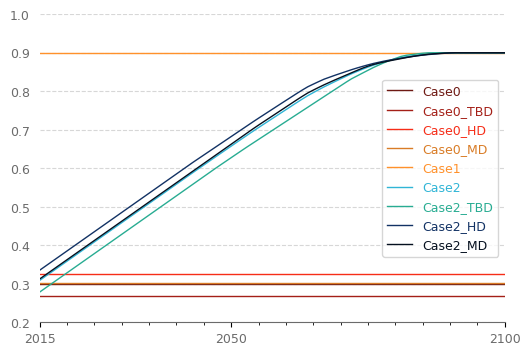

In [26]:
fig = plt.figure(figsize=(6, 4))
specific_years = [2015, 2050, 2100]
labelcolor = '#6b6b6b'
background = 'f8f8f8'
alpha = 0.5
width = 1
fontsize = 9
lc1 = '#6e1913'
lc2 = '#a42018'
lc3 = '#f62d18'
lc4 = '#d97c26'
lc5 = '#ff912b'
lc6 = '#30b5d6'
lc7 = '#28ac92'
lc8 = '#123264'
lc9 = '#05101f'
line1=plt.plot(years, line1_data, label='Case0', linewidth=width, linestyle='-', color=lc1)
line2=plt.plot(years, line1_tbd_data, label='Case0_TBD', linewidth=width, linestyle='-', color=lc2)
plt.plot(years, line1_hd_data, label='Case0_HD', linewidth=width,linestyle='-', color=lc3)
plt.plot(years, line1_md_data, label='Case0_MD', linewidth=width, linestyle='-', color=lc4)

plt.plot(years, line2_data, label='Case1', linewidth=width, linestyle='-', color=lc5)

plt.plot(years, dyn_alb, label='Case2', linewidth=width, linestyle='-', color=lc6)
plt.plot(years, dyn_tbd, label='Case2_TBD', linewidth=width, linestyle='-', color=lc7)
plt.plot(years, dyn_hd, label='Case2_HD', linewidth=width, linestyle='-', color=lc8)
plt.plot(years, dyn_md, label='Case2_MD', linewidth=width, linestyle='-', color=lc9)

#major_locator = MultipleLocator(5)
#plt.gca().xaxis.set_major_locator(major_locator)
plt.tick_params(axis='y', which='both', left=False, right=False, labelleft=True, labelcolor=labelcolor) # 坐标轴刻度显示
plt.tick_params(axis='x', which='both', top=False, bottom=True, labelbottom=True, labelcolor=labelcolor) # 坐标轴刻度显示
# Hide the left, top, and right spines
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
# Set color of the x-axis line
plt.gca().spines['bottom'].set_color(labelcolor)

minor_locator = MultipleLocator(5)
plt.gca().xaxis.set_minor_locator(minor_locator)

plt.xticks(specific_years,fontsize=fontsize,color=labelcolor)
plt.yticks(fontsize=fontsize,color=labelcolor)
plt.xlim(2015,2100)
plt.ylim(0.2,1.0)
# Add labels and title
#plt.rcParams['axes.facecolor'] = ()
#plt.xlabel('Year',fontsize=12,color=labelcolor)
#plt.ylabel('Albedo',fontsize=fontsize)  # Add an appropriate Y-axis label
#plt.yaxis.set_label_coords(0, 1.02)
#plt.title('Global annual mean roof albedo',loc='left',fontsize=fontsize)
plt.grid(True, which='major', axis='y',linestyle='--',linewidth=0.8, alpha=0.5)
# Add a legend
legend=plt.legend(fontsize=fontsize)
#legend.get_texts()[0].set_color(lc1)
for i in range(9):
    legend.get_texts()[i].set_color(globals()['lc' + str(i + 1)])

plt.margins(0.15)
# Show the plot
#plt.grid(True)
plt.show()
fig.savefig('urbanalbedo.png', dpi=300)